In [44]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import seaborn as sns
import matplotlib.pyplot as plt

In [191]:
# Load train and test data 

pathway = "/lfs1/pjtoral/cognitive-decline/scripts/data/revised/standardized/mci_included"
df_train_ADNI1 = pd.read_csv(pathway + "/train_ADNI1_9DOF.csv")
df_train_ADNI2 = pd.read_csv(pathway + "/train_ADNI2_9DOF.csv")
df_train_ADNI3 = pd.read_csv(pathway + "/train_ADNI3_9DOF.csv")
df_train = pd.concat([df_train_ADNI1, df_train_ADNI2, df_train_ADNI3], ignore_index=True).reset_index(drop=True)


df_test_ADNI1 = pd.read_csv(pathway + "/test_ADNI1_9DOF.csv")
df_test_ADNI2 = pd.read_csv(pathway + "/test_ADNI2_9DOF.csv")
df_test_ADNI3 = pd.read_csv(pathway + "/test_ADNI3_9DOF.csv")
df_test = pd.concat([df_test_ADNI1, df_test_ADNI2, df_test_ADNI3], ignore_index=True).reset_index(drop=True)
# Remove NaN values
df_test = df_test.dropna(subset=['MMSE'])
# Remove infinite values
df_test = df_test[np.isfinite(df_test['MMSE'])]

# Remove NaN values
df_train = df_train.dropna(subset=['MMSE'])
# Remove infinite values
df_train = df_train[np.isfinite(df_train['MMSE'])]


dataset = df_train[['MMSE']].values
dataset_sorted = df_train[['MMSE']].sort_values("MMSE").values

dataset_test = df_test[['MMSE']].values
dataset_test_sorted = df_test[['MMSE']].sort_values("MMSE").values

In [222]:
def plot_data_details(dataset,title,ax):
    mean = np.mean(dataset)
    median = np.median(dataset.values)
    std_dev = np.std(dataset)
    ax.hist(dataset, bins=5, color='lightblue', label='5-Bin Histogram')
    ax.axvline(mean, color='red', linestyle='dotted', linewidth=1,label=f'Mean: {mean:.2f}')
    # plt.axvline(median, color='green', linestyle='dotted', linewidth=1, label=f'Median: {median:.2f}')
    ax.axvline(mean + std_dev, color='purple', linestyle='dotted', linewidth=1, label=f'Standard Deviation: {std_dev:.2f}')
    ax.axvline(mean - std_dev, color='purple', linestyle='dotted', linewidth=1)

    ax.set_xlabel('Cognitive Assessment (MMSE) Raw Values')
    ax.set_ylabel('Number of Examples: '+str(dataset.shape[0]))
    ax.set_title(title)
    ax.legend(loc="center left")

In [223]:
def plot_data_distribution(dataset,title,ax):
    kde_g = KernelDensity(kernel='tophat', bandwidth=0.2)
    kde_g.fit(dataset)
    x_range = np.linspace(dataset.min()-0.3, dataset.max()+0.3, num=size)
    # compute the log-likelihood of each sample
    log_density = kde.score_samples(dataset_sorted)
    density = np.exp(log_density)

    weights = (2 - density)**2
    # weights = weights / np.sum(weights)
    # print(weights)
    # plt.plot(dataset_sorted, weights,color='Red',alpha=0.8,label='Sample Weights')
    # Add vertical lines for mean, median, and standard deviation

    # draw KDE curve
    # plt.plot(dataset_sorted, density,color='gray',alpha=0.8,label='Gaussian KDE for Sample Weighting')
    # plt.hist(df_train['MMSE'], bins=5, density=True, alpha=0.5, color='lightblue', label='MMSE 5-Bin Histogram')
    sns.kdeplot(dataset, bw_method=0.4, label='KDE Plot',alpha=0.5, fill=True,ax=ax)

    # plt.axvline(mean, color='red', linestyle='dotted', linewidth=1, ymax=0.5, label=f'Mean: {mean:.2f}')
    # plt.axvline(median, color='green', linestyle='dotted', linewidth=1, ymax=0.5, label=f'Median: {median:.2f}')
    # plt.axvline(mean + std_dev, color='purple', linestyle='dotted', linewidth=1, ymax=0.5, label=f'Standard Deviation: {std_dev:.2f}')
    # plt.axvline(mean - std_dev, color='purple', linestyle='dotted', linewidth=1, ymax=0.5)
    ax.plot(dataset_sorted[:, 0], -0.005 - 0.01 * np.random.random(dataset_sorted.shape[0]),"+k",alpha=0.1)
    # Add labels and title
    ax.set_xlabel('Cognitive Assessment (MMSE) Raw Values')
    ax.set_ylabel('Density')
    ax.set_title(title+' Distribution')
    ax.legend(loc="center left")
    
    

/nas/home/pjtoral/.conda/envs/pjt/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  "X does not have valid feature names, but"
/nas/home/pjtoral/.conda/envs/pjt/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  "X does not have valid feature names, but"


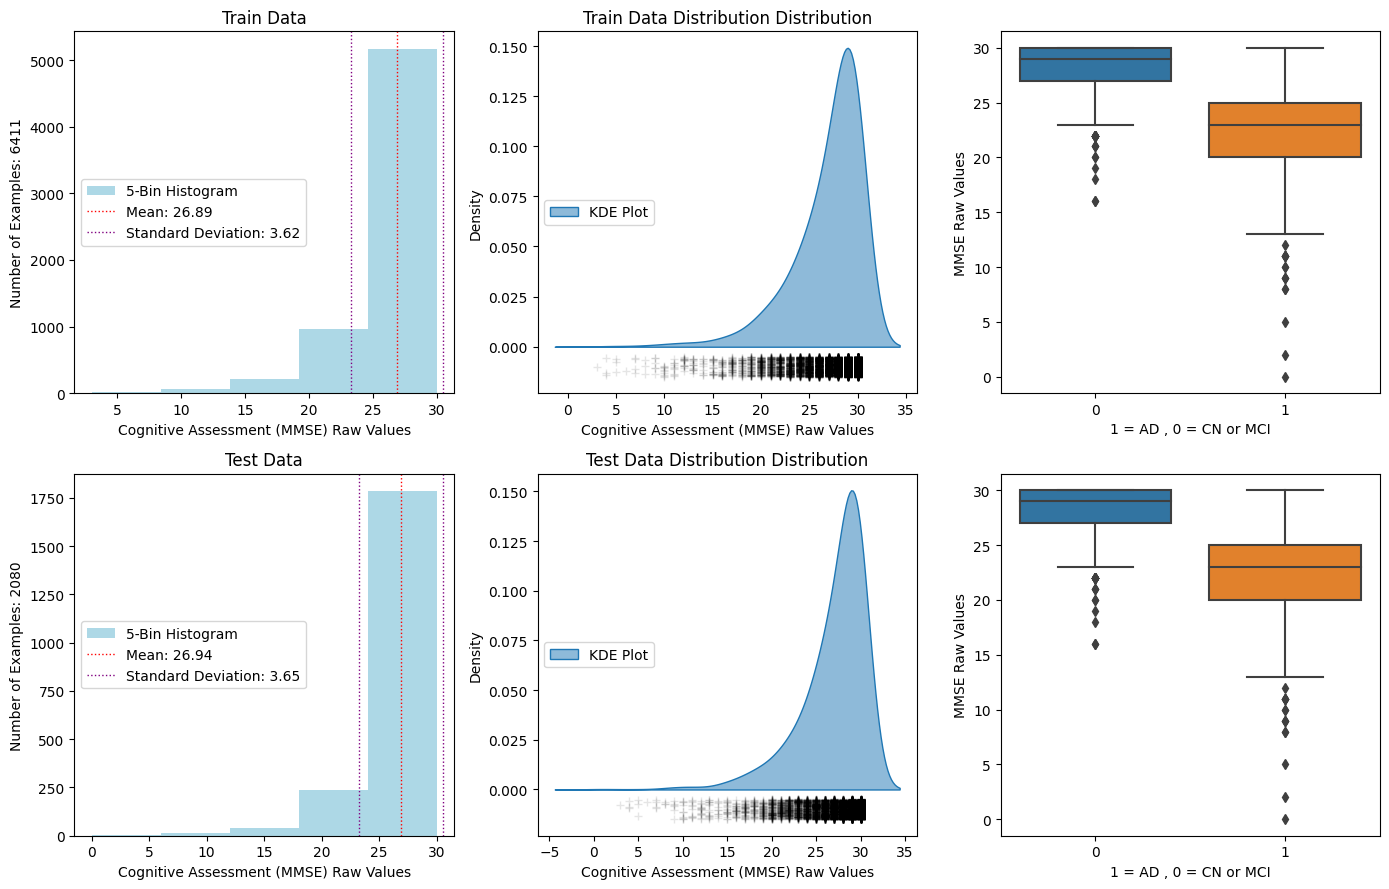

In [241]:
# Train Data
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 9))
plot_data_details(df_train["MMSE"], "Train Data",axs[0,0])
plot_data_distribution(df_train[["MMSE"]],"Train Data Distribution",axs[0,1])
sns.boxplot(data=df_test, x="label", y="MMSE",ax=axs[0,2])
axs[0,2].set_xlabel("1 = AD , 0 = CN or MCI")
axs[0,2].set_ylabel("MMSE Raw Values")


plot_data_details(df_test["MMSE"], "Test Data",axs[1,0])
plot_data_distribution(df_test[["MMSE"]],"Test Data Distribution",axs[1,1])
sns.boxplot(data=df_test, x="label", y="MMSE",ax=axs[1,2])
axs[1,2].set_xlabel("1 = AD , 0 = CN or MCI")
axs[1,2].set_ylabel("MMSE Raw Values")

plt.tight_layout()
plt.show()

